# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [2]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [3]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']

In [4]:
# Step 1: Set Up Parameters

# Location coordinates for London
london_latitude = 51.5074
london_longitude = -0.1278

# Location coordinates for Seattle
seattle_latitude = 47.6062
seattle_longitude = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']

In [5]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

# Parameters for London
london_params = {
    'latitude': london_latitude,
    'longitude': london_longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

# Parameters for Seattle
seattle_params = {
    'latitude': seattle_latitude,
    'longitude': seattle_longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

# API request for London
london_response = requests.get(base_url, params=london_params)

# API request for Seattle
seattle_response = requests.get(base_url, params=seattle_params)


In [6]:
# Check if the requests were successful for both cities

# Check London request
if london_response.status_code == 200:
    print('Data for London fetched successfully!')
else:
    print(f'Failed to fetch data for London. Status code: {london_response.status_code}')

# Check Seattle request
if seattle_response.status_code == 200:
    print('Data for Seattle fetched successfully!')
else:
    print(f'Failed to fetch data for Seattle. Status code: {seattle_response.status_code}')


Data for London fetched successfully!
Data for Seattle fetched successfully!


In [7]:
# Step 3: Load Data into pandas DataFrames

# Load London data
london_data = london_response.json()
london_hourly_data = london_data['hourly']
london_df = pd.DataFrame(london_hourly_data)

# Load Seattle data
seattle_data = seattle_response.json()
seattle_hourly_data = seattle_data['hourly']
seattle_df = pd.DataFrame(seattle_hourly_data)

# Display the first few rows of each DataFrame
print("London Data:")
print(london_df.head())
print("\nSeattle Data:")
print(seattle_df.head())


London Data:
               time  temperature_2m  relativehumidity_2m  precipitation
0  2022-01-01T00:00            12.7                   93            0.0
1  2022-01-01T01:00            12.8                   93            0.0
2  2022-01-01T02:00            12.5                   93            0.0
3  2022-01-01T03:00            12.3                   92            0.0
4  2022-01-01T04:00            11.9                   93            0.0

Seattle Data:
               time  temperature_2m  relativehumidity_2m  precipitation
0  2022-01-01T00:00            -6.4                   76            0.0
1  2022-01-01T01:00            -8.3                   82            0.0
2  2022-01-01T02:00            -8.1                   82            0.0
3  2022-01-01T03:00            -7.9                   81            0.0
4  2022-01-01T04:00            -6.2                   73            0.0


In [8]:
# Step 4: Data Cleaning

# Function to clean dataframe
def clean_dataframe(df):
    # Convert 'time' column to datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Set 'time' as the index
    df.set_index('time', inplace=True)
    
    # Check for missing values
    print("Missing values:")
    print(df.isnull().sum())
    
    return df

# Clean London data
london_df = clean_dataframe(london_df)
print("\nLondon DataFrame after cleaning:")
print(london_df.head())

# Clean Seattle data
seattle_df = clean_dataframe(seattle_df)
print("\nSeattle DataFrame after cleaning:")
print(seattle_df.head())


Missing values:
temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

London DataFrame after cleaning:
                     temperature_2m  relativehumidity_2m  precipitation
time                                                                   
2022-01-01 00:00:00            12.7                   93            0.0
2022-01-01 01:00:00            12.8                   93            0.0
2022-01-01 02:00:00            12.5                   93            0.0
2022-01-01 03:00:00            12.3                   92            0.0
2022-01-01 04:00:00            11.9                   93            0.0
Missing values:
temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

Seattle DataFrame after cleaning:
                     temperature_2m  relativehumidity_2m  precipitation
time                                                                   
2022-01-01 00:00:00            -6.4                   76            0.0
202

In [9]:
# Check for missing values in London DataFrame
print("Missing values in London data:")
print(london_df.isnull().sum())

# Check for missing values in Seattle DataFrame
print("\nMissing values in Seattle data:")
print(seattle_df.isnull().sum())


Missing values in London data:
temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

Missing values in Seattle data:
temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64


In [10]:
# Handle missing values (if any) for both cities
london_df.fillna(method='ffill', inplace=True)  # Forward fill for London
seattle_df.fillna(method='ffill', inplace=True)  # Forward fill for Seattle

C:\Users\KKK_9\AppData\Local\Temp\ipykernel_38900\3475442246.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  london_df.fillna(method='ffill', inplace=True)  # Forward fill for London
C:\Users\KKK_9\AppData\Local\Temp\ipykernel_38900\3475442246.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seattle_df.fillna(method='ffill', inplace=True)  # Forward fill for Seattle


In [11]:
# Step 5: Exploratory Data Analysis

# Summary Statistics for London
print("Summary Statistics for London:")
print(london_df.describe())

# Summary Statistics for Seattle
print("\nSummary Statistics for Seattle:")
print(seattle_df.describe())


Summary Statistics for London:
       temperature_2m  relativehumidity_2m  precipitation
count     8760.000000          8760.000000    8760.000000
mean        12.013014            76.635160       0.075696
std          6.651762            16.721898       0.404506
min         -5.400000            17.000000       0.000000
25%          7.400000            65.000000       0.000000
50%         11.900000            81.000000       0.000000
75%         16.400000            90.000000       0.000000
max         38.000000           100.000000      14.700000

Summary Statistics for Seattle:
       temperature_2m  relativehumidity_2m  precipitation
count     8760.000000          8760.000000    8760.000000
mean        10.485993            78.177854       0.129132
std          6.641324            14.032927       0.463708
min         -8.300000            20.000000       0.000000
25%          5.400000            69.000000       0.000000
50%          9.700000            81.000000       0.000000
75%     

In [12]:
# Resample London data and Seattle data to weekly totals
london_weekly = london_df.resample('W').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean',
    'precipitation': 'sum'
})

# Resample Seattle data to weekly totals
seattle_weekly = seattle_df.resample('W').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean',
    'precipitation': 'sum'
})


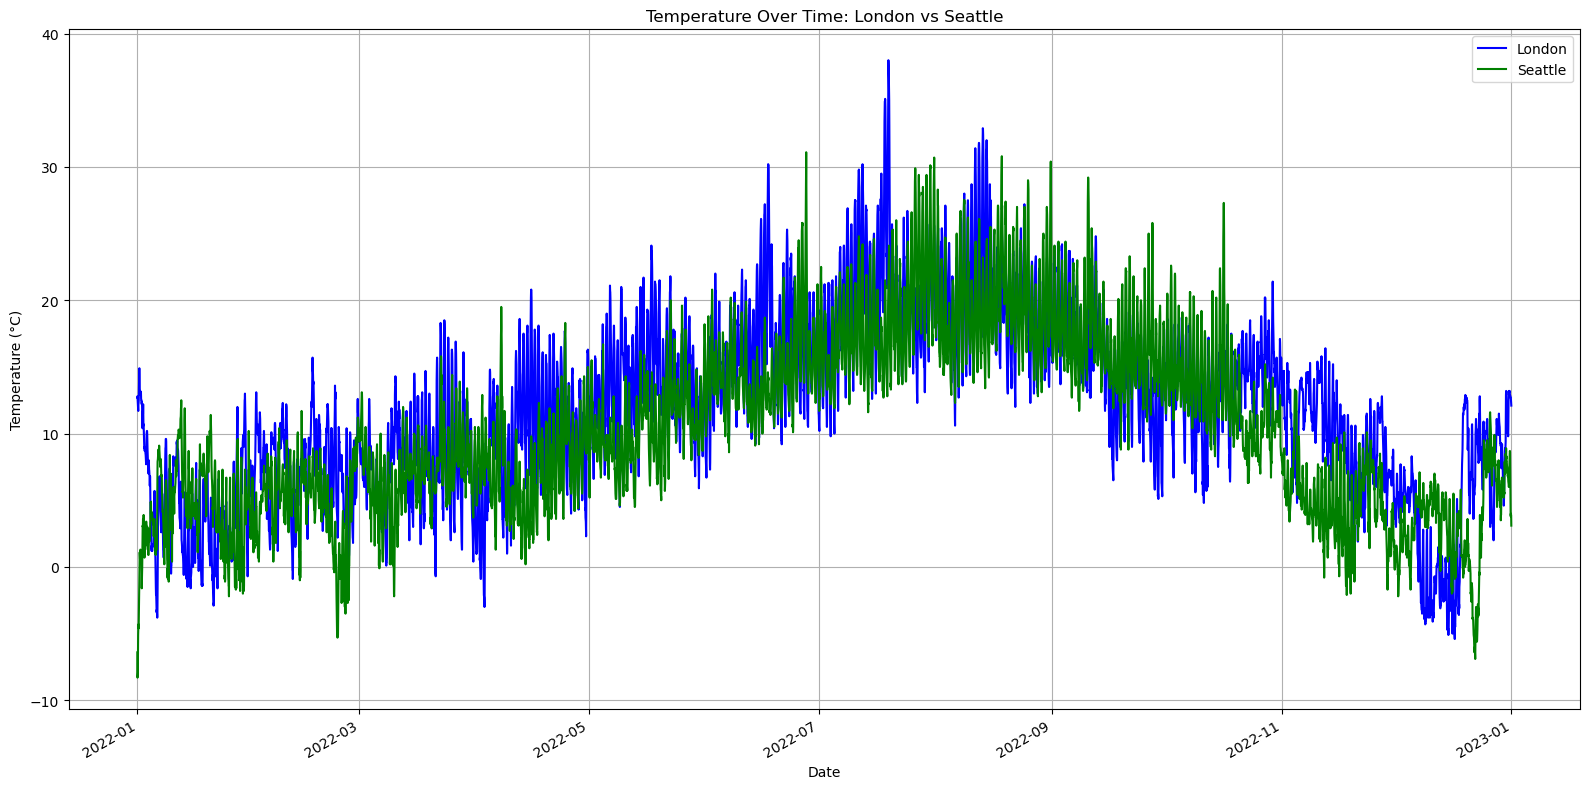

In [13]:
# Plot Temperature Over Time for both cities
plt.figure(figsize=(16, 8))

# Plot London temperature
plt.plot(london_df.index, london_df['temperature_2m'], label='London', color='blue')

# Plot Seattle temperature
plt.plot(seattle_df.index, seattle_df['temperature_2m'], label='Seattle', color='green')

plt.title('Temperature Over Time: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()


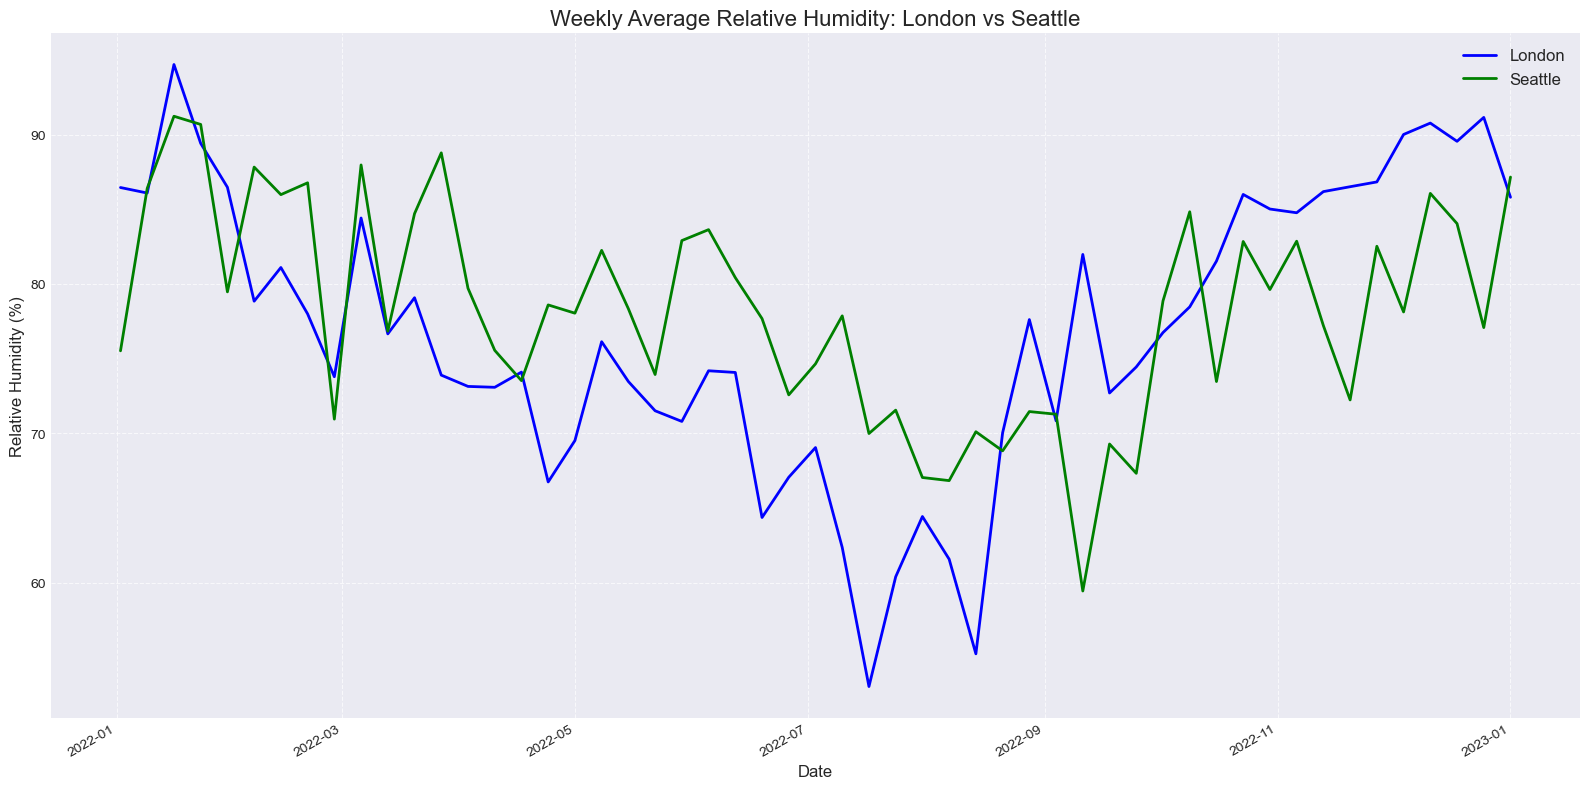

In [14]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(16, 8))

# Plot London relative humidity
plt.plot(london_weekly.index, london_weekly['relativehumidity_2m'], 
         color='blue', label='London', linewidth=2)

# Plot Seattle relative humidity
plt.plot(seattle_weekly.index, seattle_weekly['relativehumidity_2m'], 
         color='green', label='Seattle', linewidth=2)

plt.title('Weekly Average Relative Humidity: London vs Seattle', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Relative Humidity (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.show()


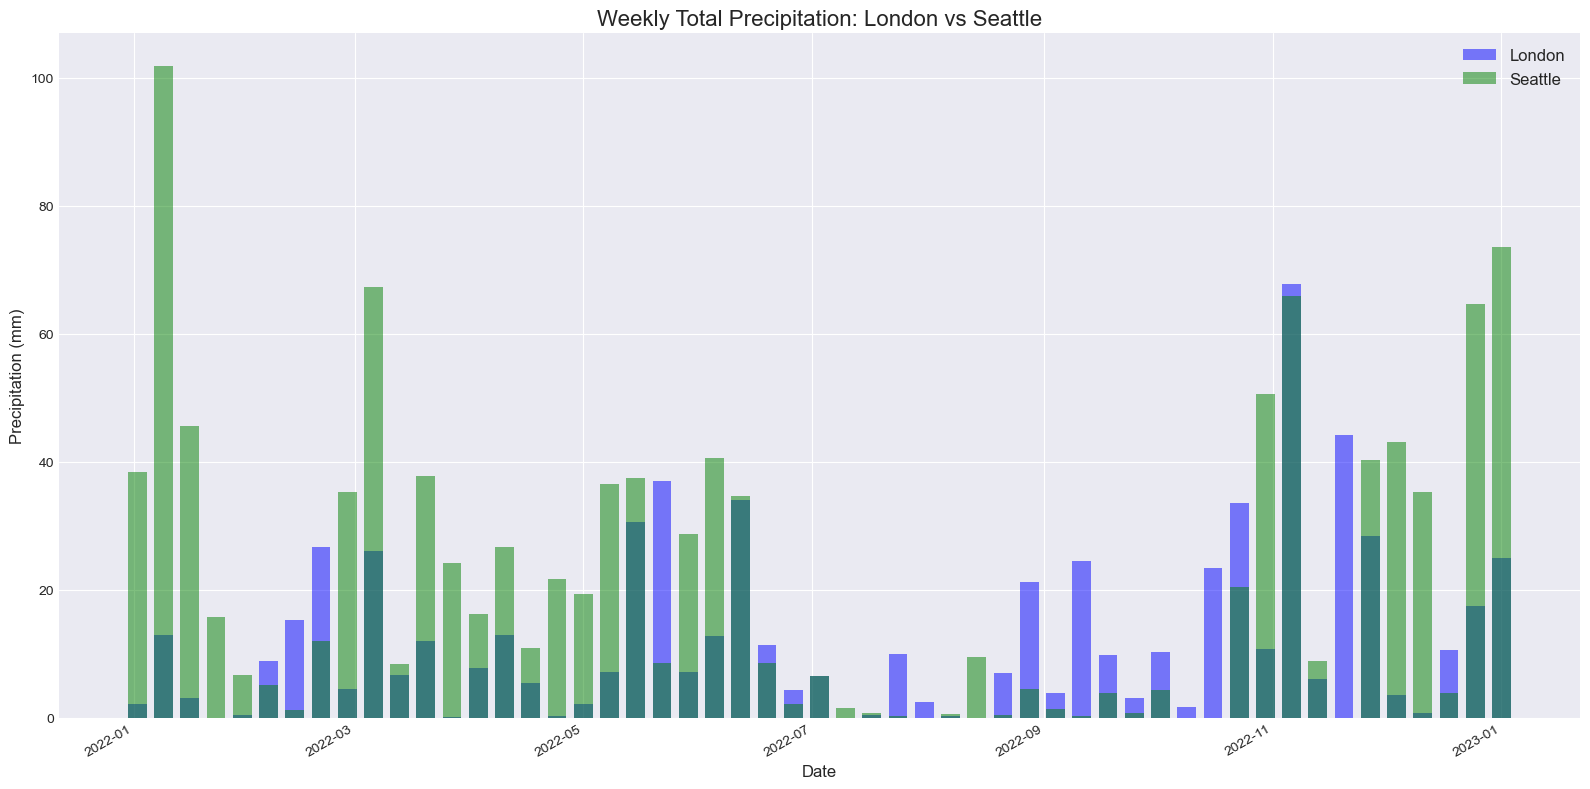

In [15]:
plt.figure(figsize=(16, 8))

# Create a bar plot for London precipitation
plt.bar(london_weekly.index, london_weekly['precipitation'], 
        width=5, alpha=0.5, color='blue', label='London')

# Create a bar plot for Seattle precipitation
plt.bar(seattle_weekly.index, seattle_weekly['precipitation'], 
        width=5, alpha=0.5, color='green', label='Seattle')

plt.title('Weekly Total Precipitation: London vs Seattle', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)
plt.legend(fontsize=12)

plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.tight_layout()

plt.show()


In [16]:
# Step 6: Correlation Analysis

# Calculate correlation for London
london_correlation = london_weekly['temperature_2m'].corr(london_weekly['relativehumidity_2m'])
print(f'London - Correlation between Temperature and Relative Humidity: {london_correlation:.2f}')

# Calculate correlation for Seattle
seattle_correlation = seattle_weekly['temperature_2m'].corr(seattle_weekly['relativehumidity_2m'])
print(f'Seattle - Correlation between Temperature and Relative Humidity: {seattle_correlation:.2f}')

# Optional: Calculate correlation for precipitation and temperature
london_precip_temp_corr = london_weekly['temperature_2m'].corr(london_weekly['precipitation'])
seattle_precip_temp_corr = seattle_weekly['temperature_2m'].corr(seattle_weekly['precipitation'])

print(f'London - Correlation between Temperature and Precipitation: {london_precip_temp_corr:.2f}')
print(f'Seattle - Correlation between Temperature and Precipitation: {seattle_precip_temp_corr:.2f}')


London - Correlation between Temperature and Relative Humidity: -0.75
Seattle - Correlation between Temperature and Relative Humidity: -0.56
London - Correlation between Temperature and Precipitation: -0.02
Seattle - Correlation between Temperature and Precipitation: -0.50


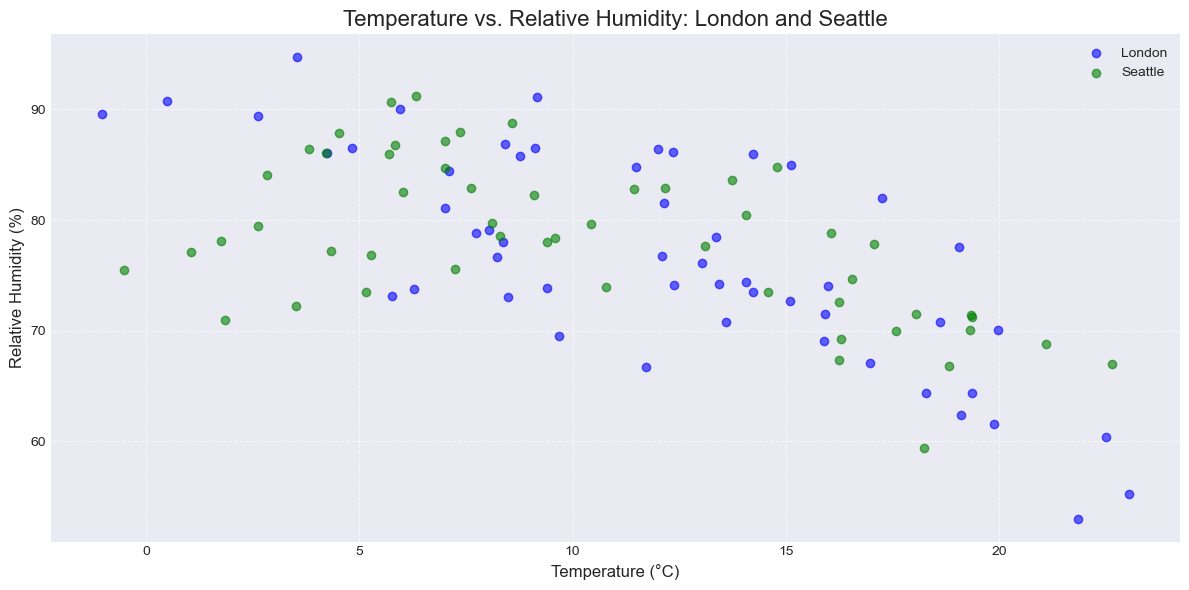

In [17]:
plt.figure(figsize=(12, 6))

# Scatter plot for London
plt.scatter(london_weekly['temperature_2m'], london_weekly['relativehumidity_2m'], 
            alpha=0.6, color='blue', label='London')

# Scatter plot for Seattle
plt.scatter(seattle_weekly['temperature_2m'], seattle_weekly['relativehumidity_2m'], 
            alpha=0.6, color='green', label='Seattle')

plt.title('Temperature vs. Relative Humidity: London and Seattle', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Relative Humidity (%)', fontsize=12)
plt.legend(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
london_total_rain = london_weekly['precipitation'].sum()
seattle_total_rain = seattle_weekly['precipitation'].sum()

print(f"Total rainfall in London: {london_total_rain:.2f} mm")
print(f"Total rainfall in Seattle: {seattle_total_rain:.2f} mm")

if london_total_rain > seattle_total_rain:
    print("London had more rainfall.")
else:
    print("Seattle had more rainfall.")


Total rainfall in London: 663.10 mm
Total rainfall in Seattle: 1131.20 mm
Seattle had more rainfall.


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **London** and **Seattle**.

---

**Seattle had more rainfall compared to London**